# РК ИУ5

### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')
sns.set(style="ticks")
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error,  median_absolute_error, r2_score 

In [2]:
data = pd.read_csv('dc-wikia-data.csv')
data = data.fillna(0)

In [3]:
data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,0,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,0,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,0,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,0,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,0,Living Characters,1237.0,"1940, April",1940.0


In [4]:
data.dtypes

page_id               int64
name                 object
urlslug              object
ID                   object
ALIGN                object
EYE                  object
HAIR                 object
SEX                  object
GSM                  object
ALIVE                object
APPEARANCES         float64
FIRST APPEARANCE     object
YEAR                float64
dtype: object

In [5]:
data.isnull().sum()
# проверим есть ли пропущенные значения

page_id             0
name                0
urlslug             0
ID                  0
ALIGN               0
EYE                 0
HAIR                0
SEX                 0
GSM                 0
ALIVE               0
APPEARANCES         0
FIRST APPEARANCE    0
YEAR                0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6896 entries, 0 to 6895
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           6896 non-null   int64  
 1   name              6896 non-null   object 
 2   urlslug           6896 non-null   object 
 3   ID                6896 non-null   object 
 4   ALIGN             6896 non-null   object 
 5   EYE               6896 non-null   object 
 6   HAIR              6896 non-null   object 
 7   SEX               6896 non-null   object 
 8   GSM               6896 non-null   object 
 9   ALIVE             6896 non-null   object 
 10  APPEARANCES       6896 non-null   float64
 11  FIRST APPEARANCE  6896 non-null   object 
 12  YEAR              6896 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 700.5+ KB


In [7]:
data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,0,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,0,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,0,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,0,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,0,Living Characters,1237.0,"1940, April",1940.0


<AxesSubplot:>

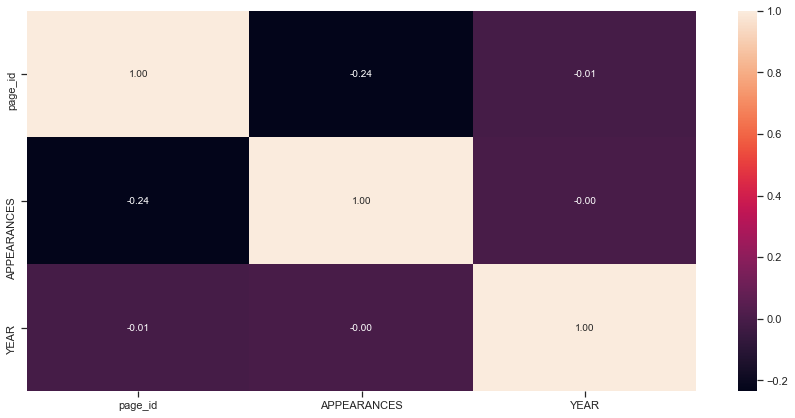

In [8]:
#Построим корреляционную матрицу
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

In [9]:
X = data.drop(['name','urlslug','ID','ALIGN','EYE','HAIR','SEX','GSM', 'ALIVE','FIRST APPEARANCE','APPEARANCES'], axis = 1)
Y = data.APPEARANCES
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())

Входные данные:

    page_id    YEAR
0     1422  1939.0
1    23387  1986.0
2     1458  1959.0
3     1659  1987.0
4     1576  1940.0 

Выходные данные:

 0    3093.0
1    2496.0
2    1565.0
3    1316.0
4    1237.0
Name: APPEARANCES, dtype: float64


In [10]:
X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, random_state = 0, test_size = 0.1)
print('Входные параметры обучающей выборки:\n\n',X_train.head(), \
      '\n\nВходные параметры тестовой выборки:\n\n', X_test.head(), \
      '\n\nВыходные параметры обучающей выборки:\n\n', Y_train.head(), \
      '\n\nВыходные параметры тестовой выборки:\n\n', Y_test.head())

Входные параметры обучающей выборки:

       page_id    YEAR
6753   253163  1991.0
1189     4885  2004.0
4938    66363  2008.0
4752   351687  1983.0
214      3610  1963.0 

Входные параметры тестовой выборки:

       page_id    YEAR
2975    90166  1994.0
4310   101554  1960.0
2303    18540  1997.0
2625   100831  2007.0
2764   116784  1988.0 

Выходные параметры обучающей выборки:

 6753      0.0
1189     22.0
4938      2.0
4752      3.0
214     131.0
Name: APPEARANCES, dtype: float64 

Выходные параметры тестовой выборки:

 2975     7.0
4310     4.0
2303    10.0
2625     8.0
2764     8.0
Name: APPEARANCES, dtype: float64


In [11]:
from sklearn.ensemble import RandomForestRegressor

In [12]:
forest_1 = RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)
forest_1.fit(X, Y)

RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)

In [13]:
Y_predict = forest_1.predict(X_test)
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, Y_predict))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, Y_predict))
print('Median absolute error:',       median_absolute_error(Y_test, Y_predict))
print('Коэффициент детерминации:',    r2_score(Y_test, Y_predict))

Средняя абсолютная ошибка: 6.432753623188407
Средняя квадратичная ошибка: 587.1619130434783
Median absolute error: 1.0
Коэффициент детерминации: 0.8881151399908548


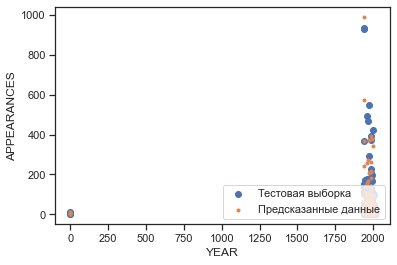

In [14]:
plt.scatter(X_test.YEAR, Y_test,    marker = 'o', label = 'Тестовая выборка')
plt.scatter(X_test.YEAR, Y_predict, marker = '.', label = 'Предсказанные данные')
plt.legend(loc = 'lower right')
plt.xlabel('YEAR')
plt.ylabel('APPEARANCES')
plt.show()

In [15]:
from sklearn.svm import SVC , LinearSVC
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot as plt

In [ ]:
svc = SVC(kernel='linear')
svc.fit(X_train,Y_train)

In [ ]:
pred_y = svc.predict(X_test)

In [ ]:
plt.scatter(X_test.YEAR, Y_test,    marker = 's', label = 'Тестовая выборка')
plt.scatter(X_test.GKDiving, pred_y, marker = '.', label = 'Предсказанные данные')
plt.legend (loc = 'YEAR right')
plt.xlabel ('YEAR')
plt.ylabel ('APPEARANCES')
plt.show()